# Generating synthetic data sets of a river bed column forced by monoperiodic river and aquifer temperature signals

2024 developped by Nicolas Flipo from demo_gen_test.ipynb created by Guillaume de Rochefort during MOLONARI 2022 

The object of this demo is to present a class responsible for generating a simulation of pressure and temperature sensor data in cases where data from the CAPTEUR project is not available. Based on the `synthetic_MOLONARI` class in `synthetic_MOLONARI.py`.

We will show the `synthetic_MOLONARI` object which allows generating purely periodic datasets with the possibility of Gaussian noise. We will illustrate the interaction of `synthetic_MOLONARI` with the `Column` class and the `layer` class.

The other demo file `demo_val_direct.ipynb` highlights a more global use of the classes from `synthetic_MOLONARI.py` and `val_analy.py`.


In [1]:
# démo time_series
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np




## 1. Signal Parameterization
The signals are purely periodic, and it is necessary to choose the amplitude, period, and mean value of the river temperature, aquifer temperature, and pressure signals (boundary conditions). The T1, T2, T3 sensors in the shaft are only generated using the direct model.

A possible improvement for this class is to generate multi-periodic signals similar to the parameter lists of the layer, where a list of parameters for the different desired frequencies (diurnal, monthly, annual, etc.) would be provided.

In [2]:
# l'utilisateur saisit ses paramètres d'émulation de mesure
"""Fenêtre temporelle"""
# le format demandé est celui-ci : (y,m,d,h,mn,s) compatible avec la librairie datetime
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*NSECINMIN # pas de temps en (s) # A AMELIORER AVEC UN CONVERTISSEUR AUTOMATIQUE D'UNITES

"""Conditions limites"""
# Température de la rivière
zeroT = 0
zeroT += ZERO_CELSIUS  #time_series works only with forcings in celsius. See if it is deeper in pyheatmy or not

T_riv_amp = 5
T_riv_offset = 20  + zeroT
nday = 3
P_T_riv = nday*NHOURINDAY*4*dt #monthly   period
# Température de l'aquifère
T_aq_amp = 0
T_aq_offset = 14 + zeroT
P_T_aq = -9999 # à mettre dans le init
# Pression différentielle
dH_amp = 0
dH_offset = 0.5 #1meter ?
P_dh = -9999 #14*24*4*dt


depth_sensors = [.1, .2, .3, .4]
Zbottom = 0.4

"""Bruit de mesure"""
sigma_meas_P = 0.001
sigma_meas_T = 0.1

print("dt={0:.1f}s".format(dt))

dt=3000.0s


## 2 Instantiating the objects `synthetic_MOLONARI` and `Column`
The generated object will have default values, and a series of methods must be used to update its essential parameters. In the initialisation of Time Series, the 3 intermediate temperature sensors T1, T2, T3, are initialized with a linear interpolation between Triv and Taq weighted by the distance from the sensor. Those values initialize the soil Column in a second step. For Time Series dH = Hriv-Haq

Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 3000]
param_dH_signal: [0, -9999, 0.5]
param_T_riv_signal: [5, 864000, 293.15]
param_T_aq_signal: [0, -9999, 287.15]
sigma_meas_P: 0.001
sigma_meas_T: 0.1
Entering Hydraulic head differential generation with amplitude 0, period of -9999, offset 0.5, dt 3000.0 --> 
constant signal

Entering T_riv generation with amplitude 5, period of 864000, offset 293.15, dt 3000.0 --> 
periodic signal



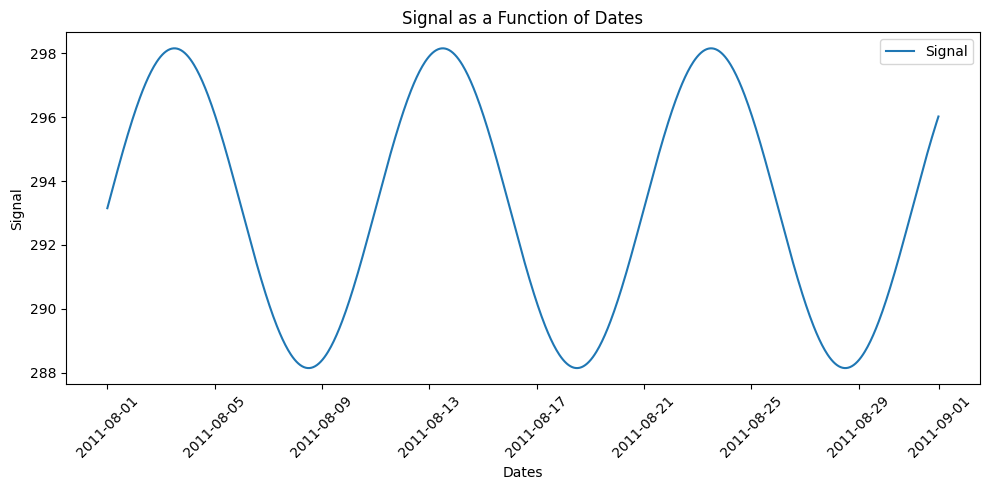

Entering T_aq generation with amplitude 0, period of -9999, offset 287.15, dt 3000.0 --> 
constant signal

Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [291.65       291.73180582 291.8135727  291.89526173 291.97683404
 292.05825078 292.13947322 292.2204627  292.30118067 292.38158871
 292.46164855 292.5413221  292.62057142 292.6993588  292.77764675
 292.85539799 292.93257554 293.00914264 293.08506287 293.16030009
 293.23481848 293.30858259 293.3815573  293.45370788 293.525
 293.59539972 293.66487353 293.73338837 293.80091164 293.86741118
 293.93285536 293.99721302 294.06045354 294.12254681 294.18346328
 294.24317396 294.30165043 294.35886486 294.41479001 294.46939928
 294.52266666 294.57456681 294.62507503 294.67416727 294.72182017
 294.76801105 294.81271792 294.85591952 294.89759526 294.93772533
 294.97629062 295.01327278 295.0486542  295.08241805 295.11454825
 295.14502951 295.17384733 295.20098799 295.22643857 295.25018695
 295.27222185 295.2925327

In [3]:
"""Instanciation de l'objet Time_series"""
# un dictionnaire qui facilite le paramétrage avec des variables globales définies plus haut
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
}
# instanciation du simulateur de données
emu_observ_test_user1 = synthetic_MOLONARI.from_dict(time_series_dict_user1)

# print("Checking params synthetic_MOLONARI")
# print("param_time_dates:", emu_observ_test_user1._param_dates)
# print("param_dH_signal:", emu_observ_test_user1._param_dH)
# print("param_T_riv_signal:", emu_observ_test_user1._param_T_riv)
# print("param_T_aq_signal:", emu_observ_test_user1._param_T_aq)
# print("sigma_meas_P:", emu_observ_test_user1._sigma_P)
# print("sigma_meas_T:", emu_observ_test_user1._sigma_T)


print(f"dH : {emu_observ_test_user1._molonariP_data}")
print(f"Tshaft : {emu_observ_test_user1._T_Shaft_measures}")


In [4]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Couche = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "moinslog10IntrinK":11,
    "n": 0.1,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q": 1e-8,
}

# modèle une couche
Layer1 = Layer.from_dict(Couche)

print(f"Layer: {Layer1}")

nbcells = 100
# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
col_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._molonariP_data,
    "T_measures": emu_observ_test_user1._T_Shaft_measures,
    "nb_cells" : nbcells,
    "sigma_meas_P": 0.01, #float
    "sigma_meas_T": 0.1, #float
}
col = Column.from_dict(col_dict,verbose=True)
col.set_layers(Layer1)

Layer: Couche en sable : ends at 0.4 m. Param(moinslog10IntrinK=11, n=0.1, lambda_s=2, rhos_cs=4000000.0, q=1e-08)
Column created with success
Number of time steps: 893
Time step in days: 0.03468333955456016
T_riv: [293.0257122  293.23848669 293.35174353 293.65101578 293.35355532
 293.51616011 293.78753601 293.9225603  293.96705666 293.85006956
 294.25838953 294.3037205  294.5139154  294.63566922 294.89192332
 294.92980757 295.05995717 294.99208728 295.1103174  295.12809344
 295.21431866 295.28148883 295.38267609 295.62084977 295.54058088
 295.93277773 295.90785693 295.93924519 295.96408559 296.29428359
 296.06393629 296.25496945 296.33358702 296.47275798 296.41717001
 296.75171776 296.81404558 296.77122062 296.91438753 297.18674235
 297.01276495 297.16829225 297.28252651 296.81923039 297.1813531
 297.19423362 297.44230959 297.42638159 297.38300643 297.60143417
 297.43364458 297.61988226 297.85428116 297.67881357 297.84040243
 297.8036581  297.66988335 297.88135568 298.04588292 298.057

## 3 Generating temperature in the river bed

We use the [_measures_column_one_layer(col, layers_list)] method, which updates the measurements for T1, T2 and T3 at each point in time with the direct model pyheatmy. The sensor time series are then perturbated with a gaussian noise in the Time series object. We display the temperature simulated at sensors.

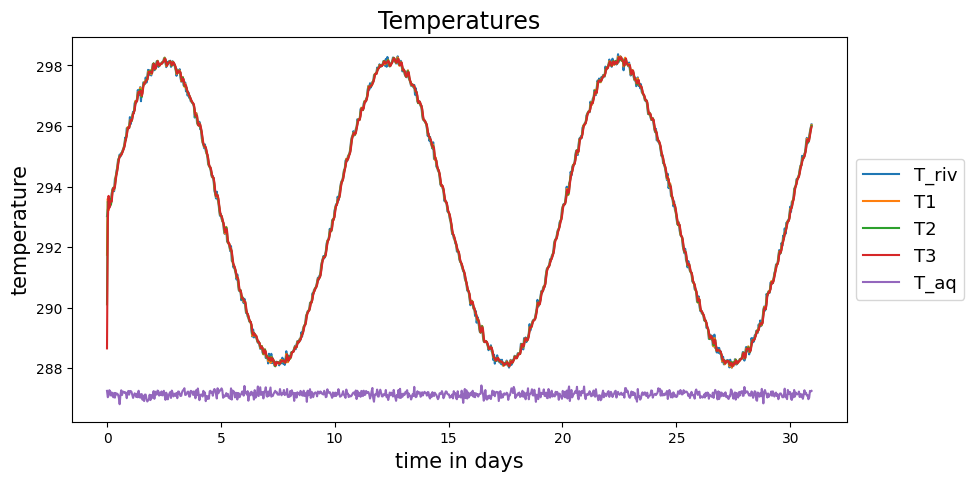

In [5]:

# print(emu_observ_test_user1._T_Shaft)
emu_observ_test_user1._measures_column_one_layer(col)
#emu_observ_test_user1._plot_molonariT_data()
col.plot_temperature_at_sensors(verbose=False)



The simulated temperatures with pyheatmy are compared to the initial values of the Shaft which were interpolated. Without surprise, they are very different for an advective configuration (high k value)

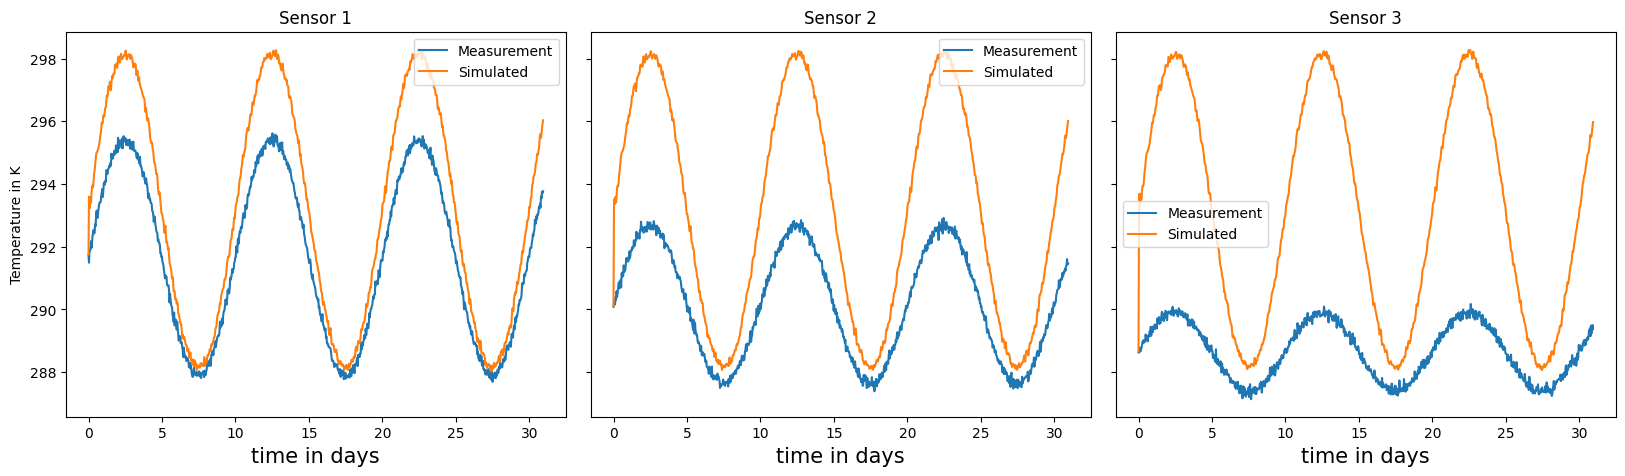

In [6]:

col.plot_compare_temperatures_sensors()

Here are temperature profiles simulated by pyheatmy

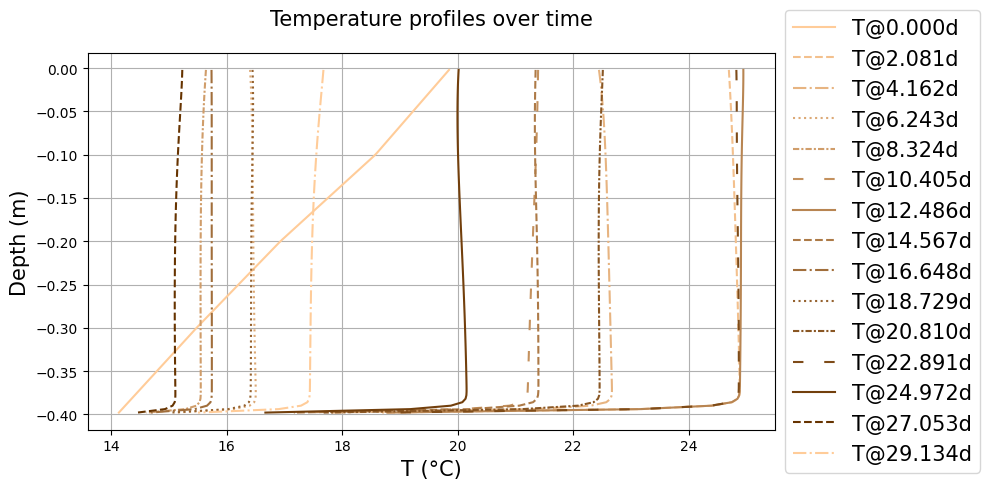

In [7]:
nt = len(col._temperatures[0,:])
dplot=15
col.plot_temperatures_umbrella(round(nt/dplot))



Now creating a new column created with the generated case study

[(datetime.datetime(2011, 8, 1, 0, 0), array([291.64174259, 289.86191297, 288.57555055, 287.43619294])), (datetime.datetime(2011, 8, 1, 0, 50), array([293.38531837, 293.65105486, 292.98492739, 286.95693623])), (datetime.datetime(2011, 8, 1, 1, 40), array([293.24023965, 293.41736847, 293.60010338, 287.07607999])), (datetime.datetime(2011, 8, 1, 2, 30), array([293.68552468, 293.42253529, 293.22229232, 287.30087336])), (datetime.datetime(2011, 8, 1, 3, 20), array([293.42027143, 293.57753974, 293.50320572, 287.23497541])), (datetime.datetime(2011, 8, 1, 4, 10), array([293.33460688, 293.35716468, 293.42141178, 286.98317146])), (datetime.datetime(2011, 8, 1, 5, 0), array([293.76270654, 293.59198478, 293.63165562, 287.09053482])), (datetime.datetime(2011, 8, 1, 5, 50), array([293.90798734, 293.89609391, 293.73013304, 286.95874411])), (datetime.datetime(2011, 8, 1, 6, 40), array([293.88074061, 294.00680132, 293.81604021, 287.02934289])), (datetime.datetime(2011, 8, 1, 7, 30), array([293.825032

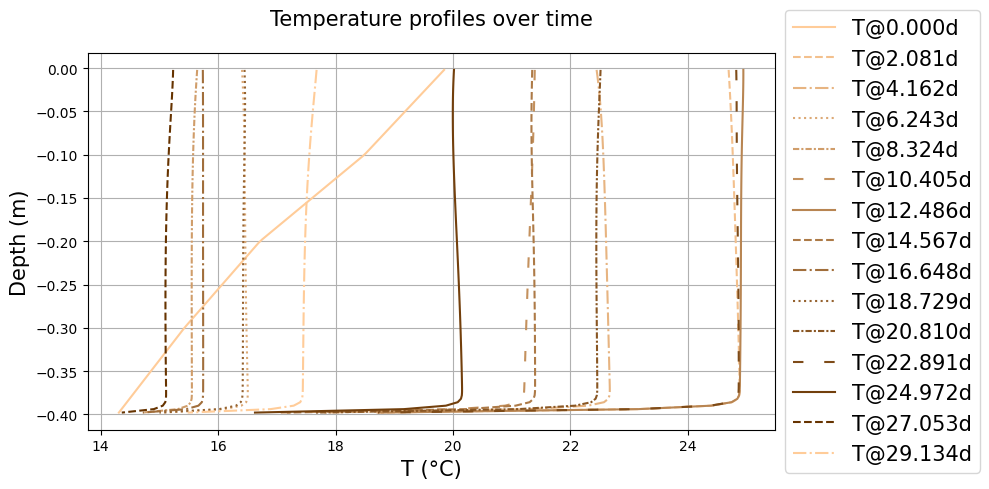

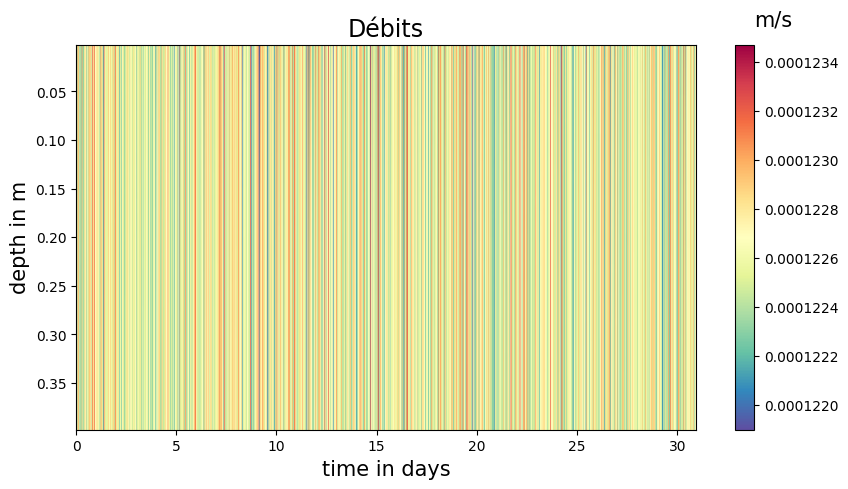

RMSE at sensor 0 : 0.09950545600994151
RMSE at sensor 1 : 0.09522908940354317
RMSE at sensor 2 : 0.09974271639641101
Total RMSE : 0.09818099734420659
Plotting Température in column. time series have nrecords =  893
Creating /Users/pgpetitmangin/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv
Creating /Users/pgpetitmangin/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv
Creating /Users/pgpetitmangin/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv
File /Users/pgpetitmangin/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv closed successfully.
File /Users/pgpetitmangin/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv closed successfully.
File /Users/pgpetitmangin/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv closed successfully.
Creating /Users/pgpetitmangin/OUTPUT_MOLONARI1D/generated_data/VirtualLabo/pressure_sensors/Pvirtual.csv
Printing Sensor f

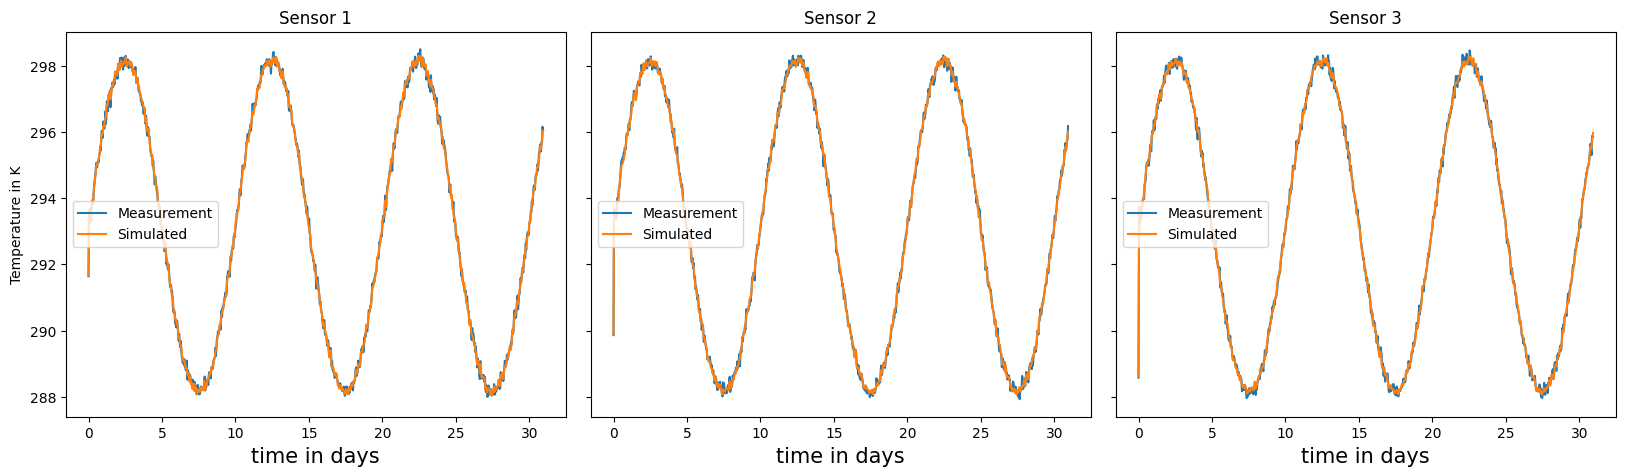

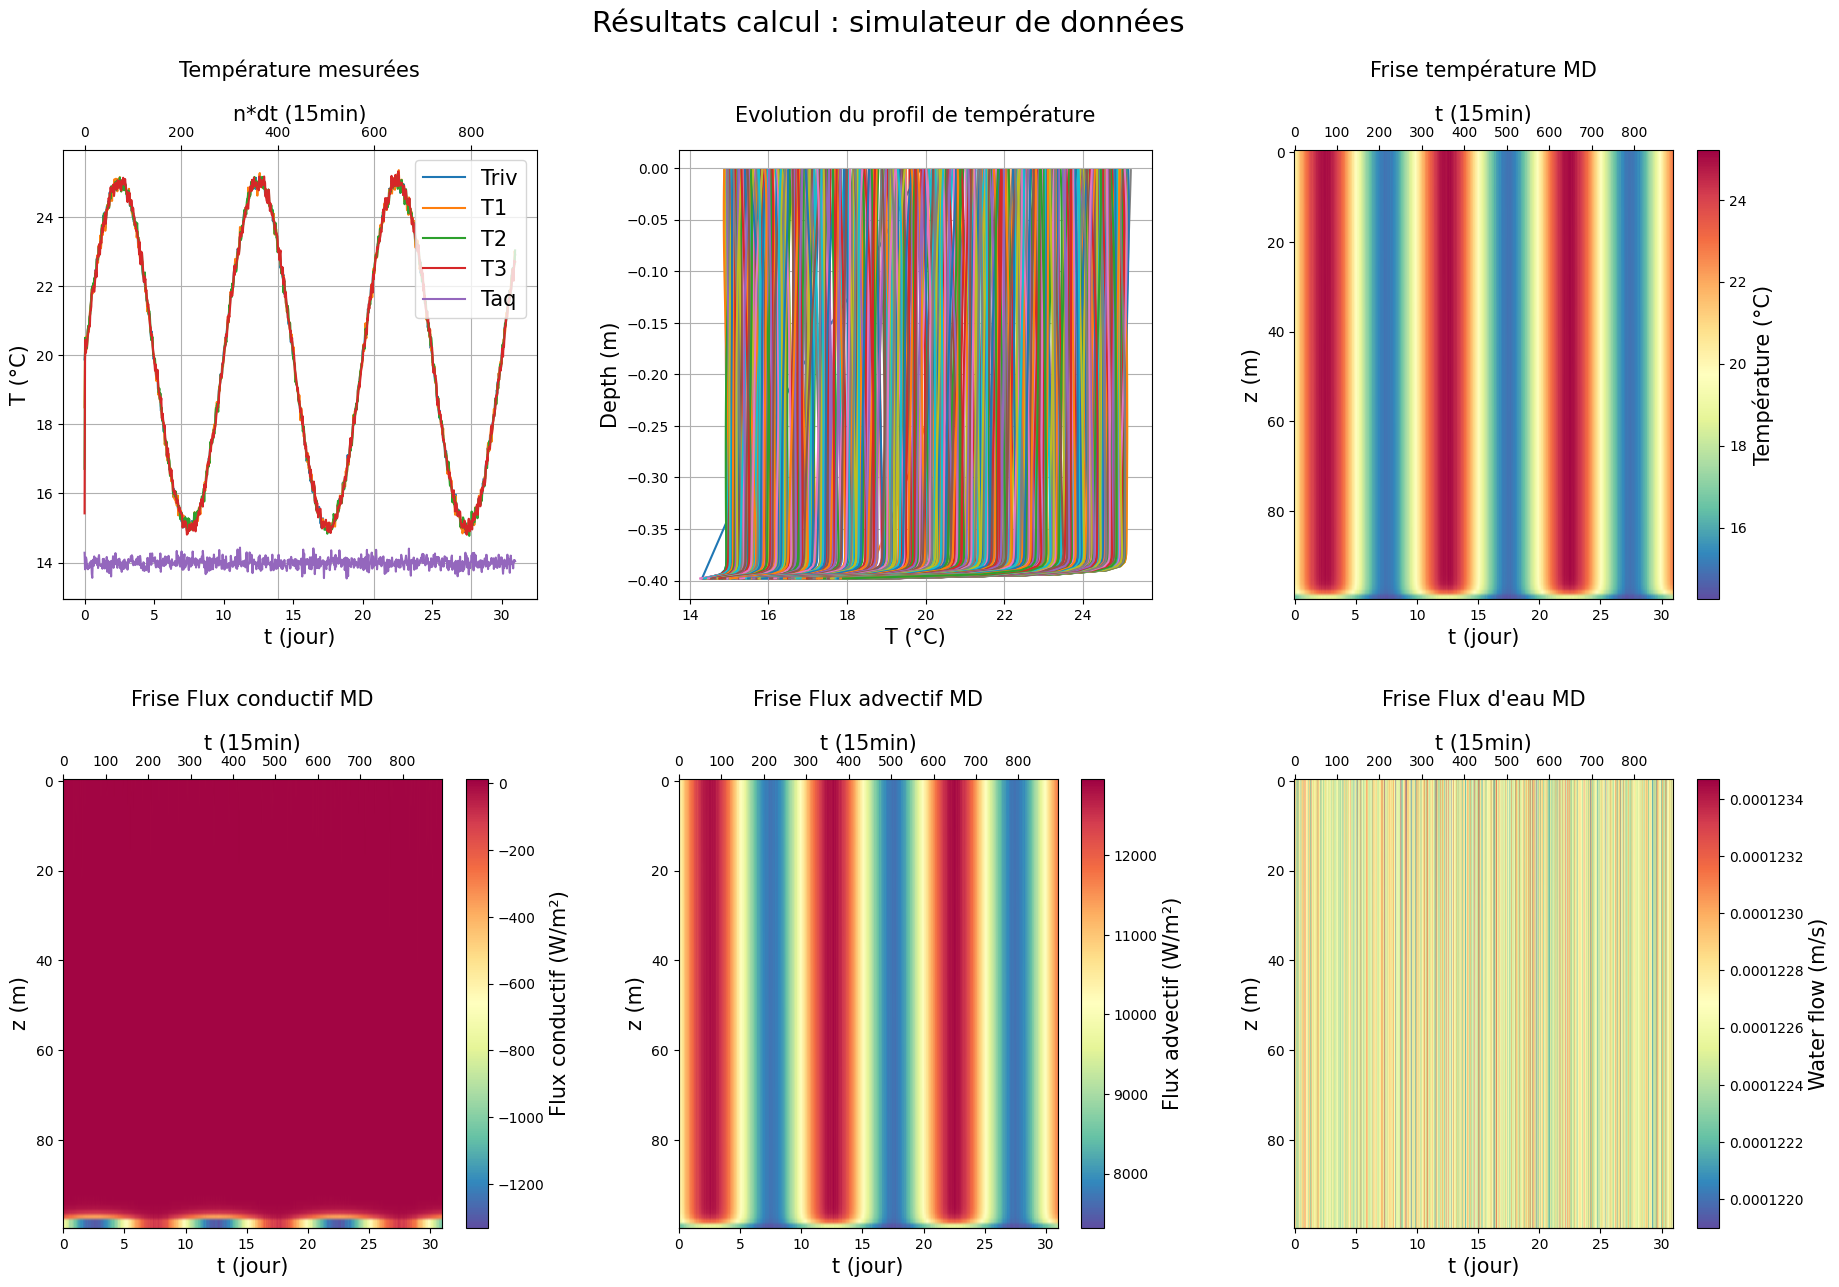

In [8]:
print(emu_observ_test_user1._molonariT_data)

# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._molonariP_data,
    "T_measures": emu_observ_test_user1._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
newCol = Column.from_dict(newCol_dict)
newCol.set_layers(Layer1)
newCol.compute_solve_transi(verbose=True)

nt = len(newCol._temperatures[0,:])
dplot=15
newCol.plot_temperatures_umbrella(round(nt/dplot))

flows = newCol.get_flows_solve()
unitLeg="m/s"
title="Débits"
newCol.plot_it_Zt(flows,title,unitLeg,1.04,2)

newCol.print_RMSE_at_sensor()
newCol.plot_compare_temperatures_sensors()
newCol.plot_CALC_results()
newCol.print_in_file_processed_MOLONARI_dataset(zeroT=0)

# Multilayered riverbed -- No printing option activated

## Warning
It seems that there is a bug at the interface between layers and also if a sensor is located at the interface

In [9]:
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 2
T_riv_offset = 20 + ZERO_CELSIUS
P_T_riv = 72*4*dt

T_aq_amp = 0
T_aq_offset = 14 + ZERO_CELSIUS
P_T_aq = 9999 # à mettre dans le init

dH_amp = 0
dH_offset = 0.1
P_dh = -9999 #14*24*4*dt

Zbottom = 0.6
depth_sensors = [.1, .25, .3, .4, Zbottom] # le code fonctionne avec n capteurs, watch the compatibility with Zbottom

In [10]:
time_series_dict_user4 = {
    "offset" : 0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": 0.05,
    "sigma_meas_T": 0.1, #float
}

Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 900]
param_dH_signal: [0, -9999, 0.1]
param_T_riv_signal: [2, 259200, 293.15]
param_T_aq_signal: [0, 9999, 287.15]
sigma_meas_P: 0.05
sigma_meas_T: 0.1
Entering Hydraulic head differential generation with amplitude 0, period of -9999, offset 0.1, dt 900.0 --> 
constant signal

Entering T_riv generation with amplitude 2, period of 259200, offset 293.15, dt 900.0 --> 
periodic signal



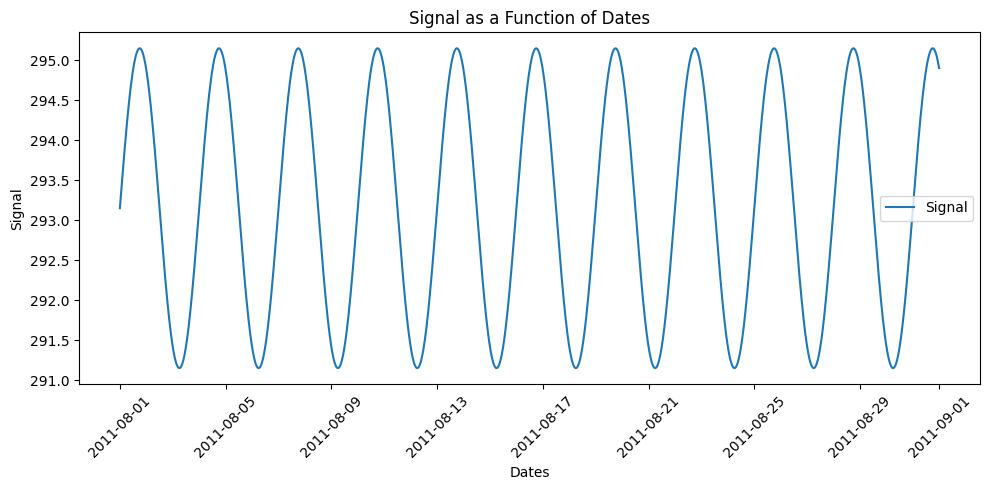

Entering T_aq generation with amplitude 0, period of 9999, offset 287.15, dt 900.0 --> 
periodic signal



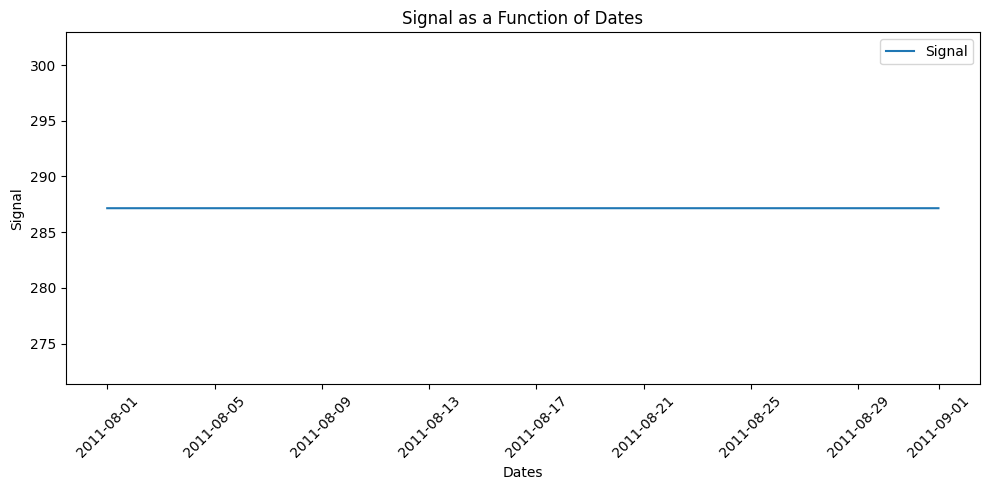

Generating Shaft with 5 sensors
5 sensors in the shaft
Temperature of Sensor 0 : [292.15       292.18635814 292.22269898 ... 293.6447879  293.62835139
 293.61121126]
Temperature of Sensor 1 : [290.65       290.6754507  290.70088929 ... 291.69635153 291.68484597
 291.67284788]
Temperature of Sensor 2 : [290.15       290.17181489 290.19361939 ... 291.04687274 291.03701083
 291.02672676]
Temperature of Sensor 3 : [289.15       289.16454326 289.17907959 ... 289.74791516 289.74134056
 289.7344845 ]
Temperature of Sensor 4 : [287.15 287.15 287.15 ... 287.15 287.15 287.15]


In [11]:
emu_observ_test_user4 = synthetic_MOLONARI.from_dict(time_series_dict_user4)
# emu_observ_test_user4._generate_all_series()



---Débogage des dimensions avant la boucle : len(K_list) = 100, nablaH.shape = (100, 2976) ---


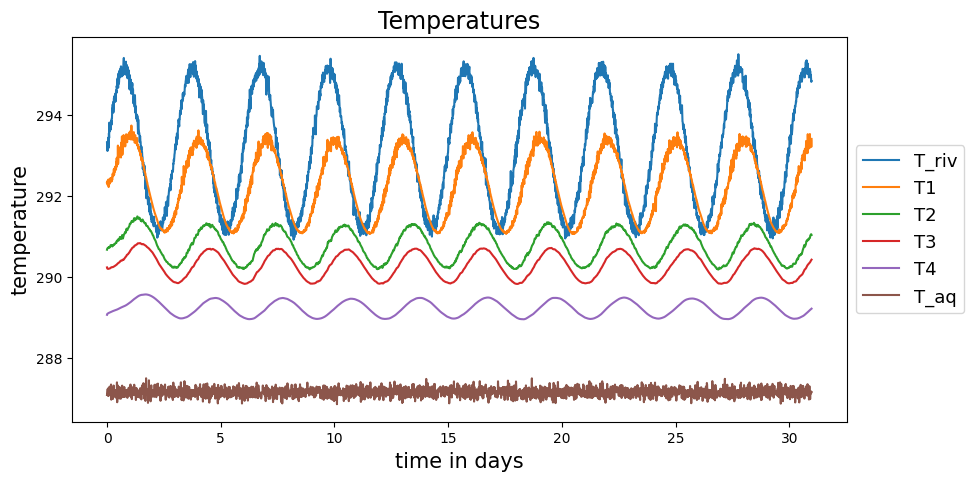


--- Débogage des matrices H_gauche et H_droite (Initialisation) ---
Matrice H_gauche :
 [[-0.0004905]]

Matrice H_droite :
 [[0.00000025]]
------------------------------------------------------------------

--- Compute Solve Transi ---
gravier : ends at 0.2 m. Param(moinslog10IntrinK=11, n=0.4, lambda_s=2, rhos_cs=4000000.0, q=0)
Couche en sable : ends at 0.6 m. Param(moinslog10IntrinK=14, n=0.1, lambda_s=2, rhos_cs=4000000.0, q=0)
Hinter [0.04437915 0.04435697 0.        ]
conditions aux limites
H_riv [0.04437915 0.10466818 0.02724686 ... 0.00265729 0.09092305 0.12748984]
H_aq [0. 0. 0. ... 0. 0. 0.]
échantillons du profondeur: ...  0.195 0.201  ...
le profondeur d'interface:  0.2
type cara asymetric
---Débogage des dimensions avant la boucle : len(K_list) = 100, nablaH.shape = (100, 2976) ---
Done.


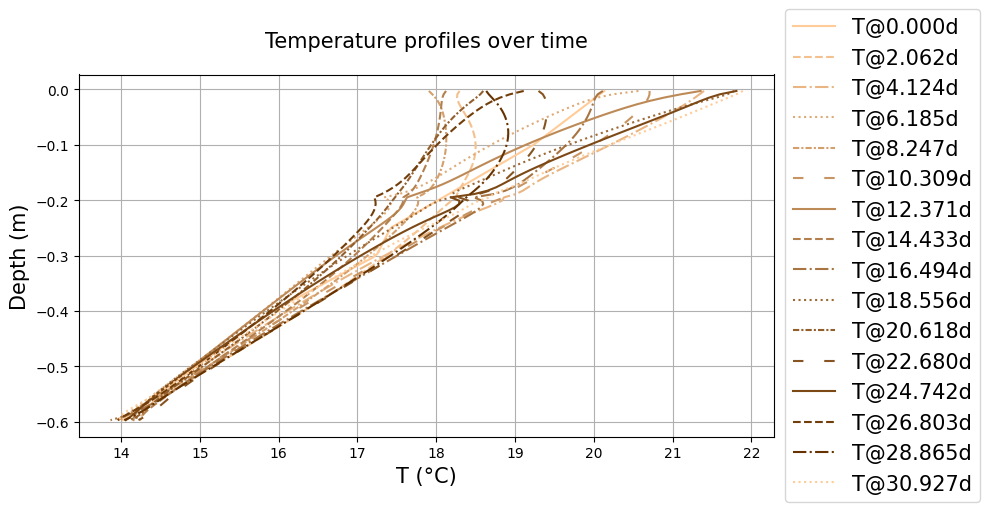

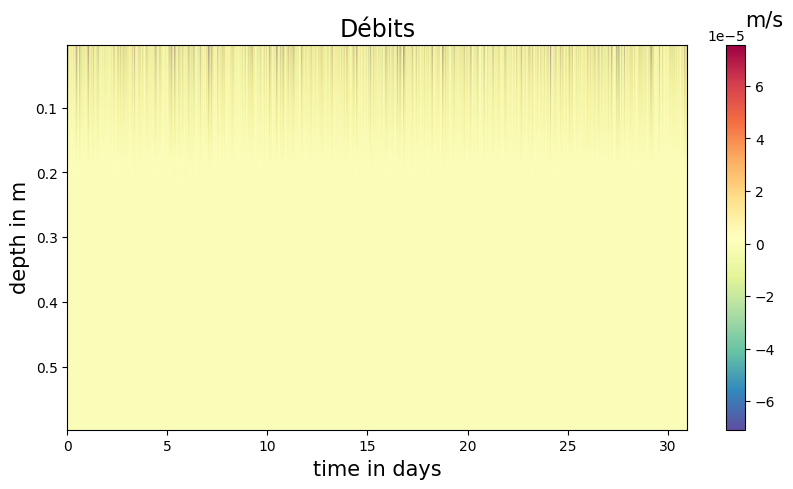

RMSE at sensor 0 : 0.09999268794484505
RMSE at sensor 1 : 0.10075421971936363
RMSE at sensor 2 : 0.10079185730674307
RMSE at sensor 3 : 0.1013700437378078
Total RMSE : 0.10072839061113913
Plotting Température in column. time series have nrecords =  2976


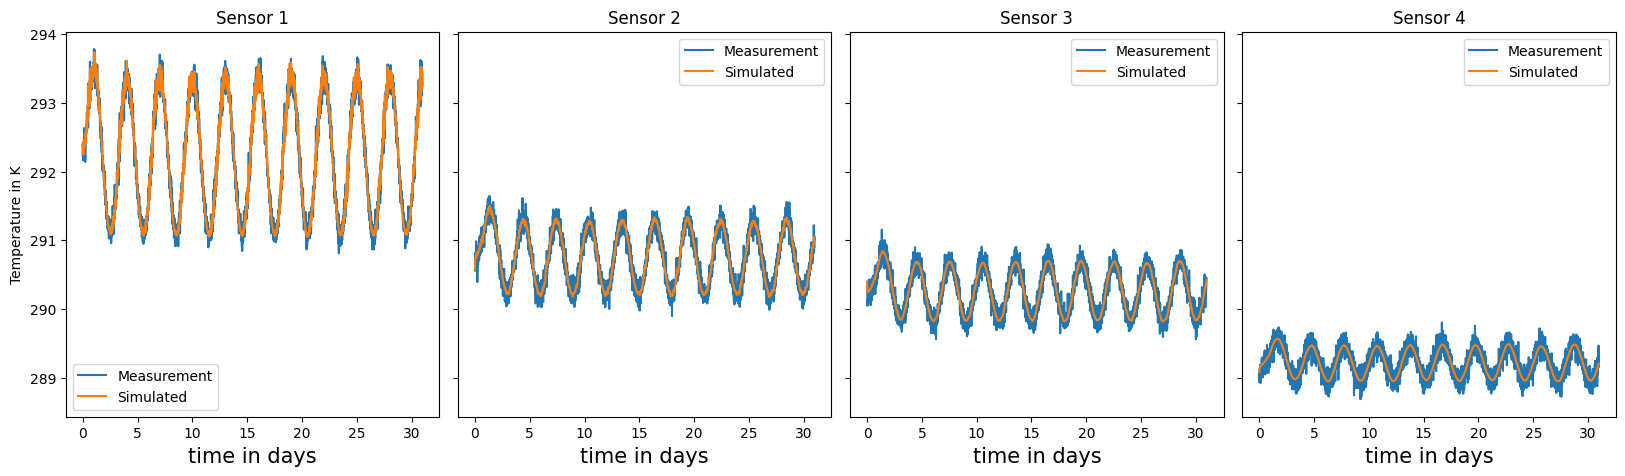

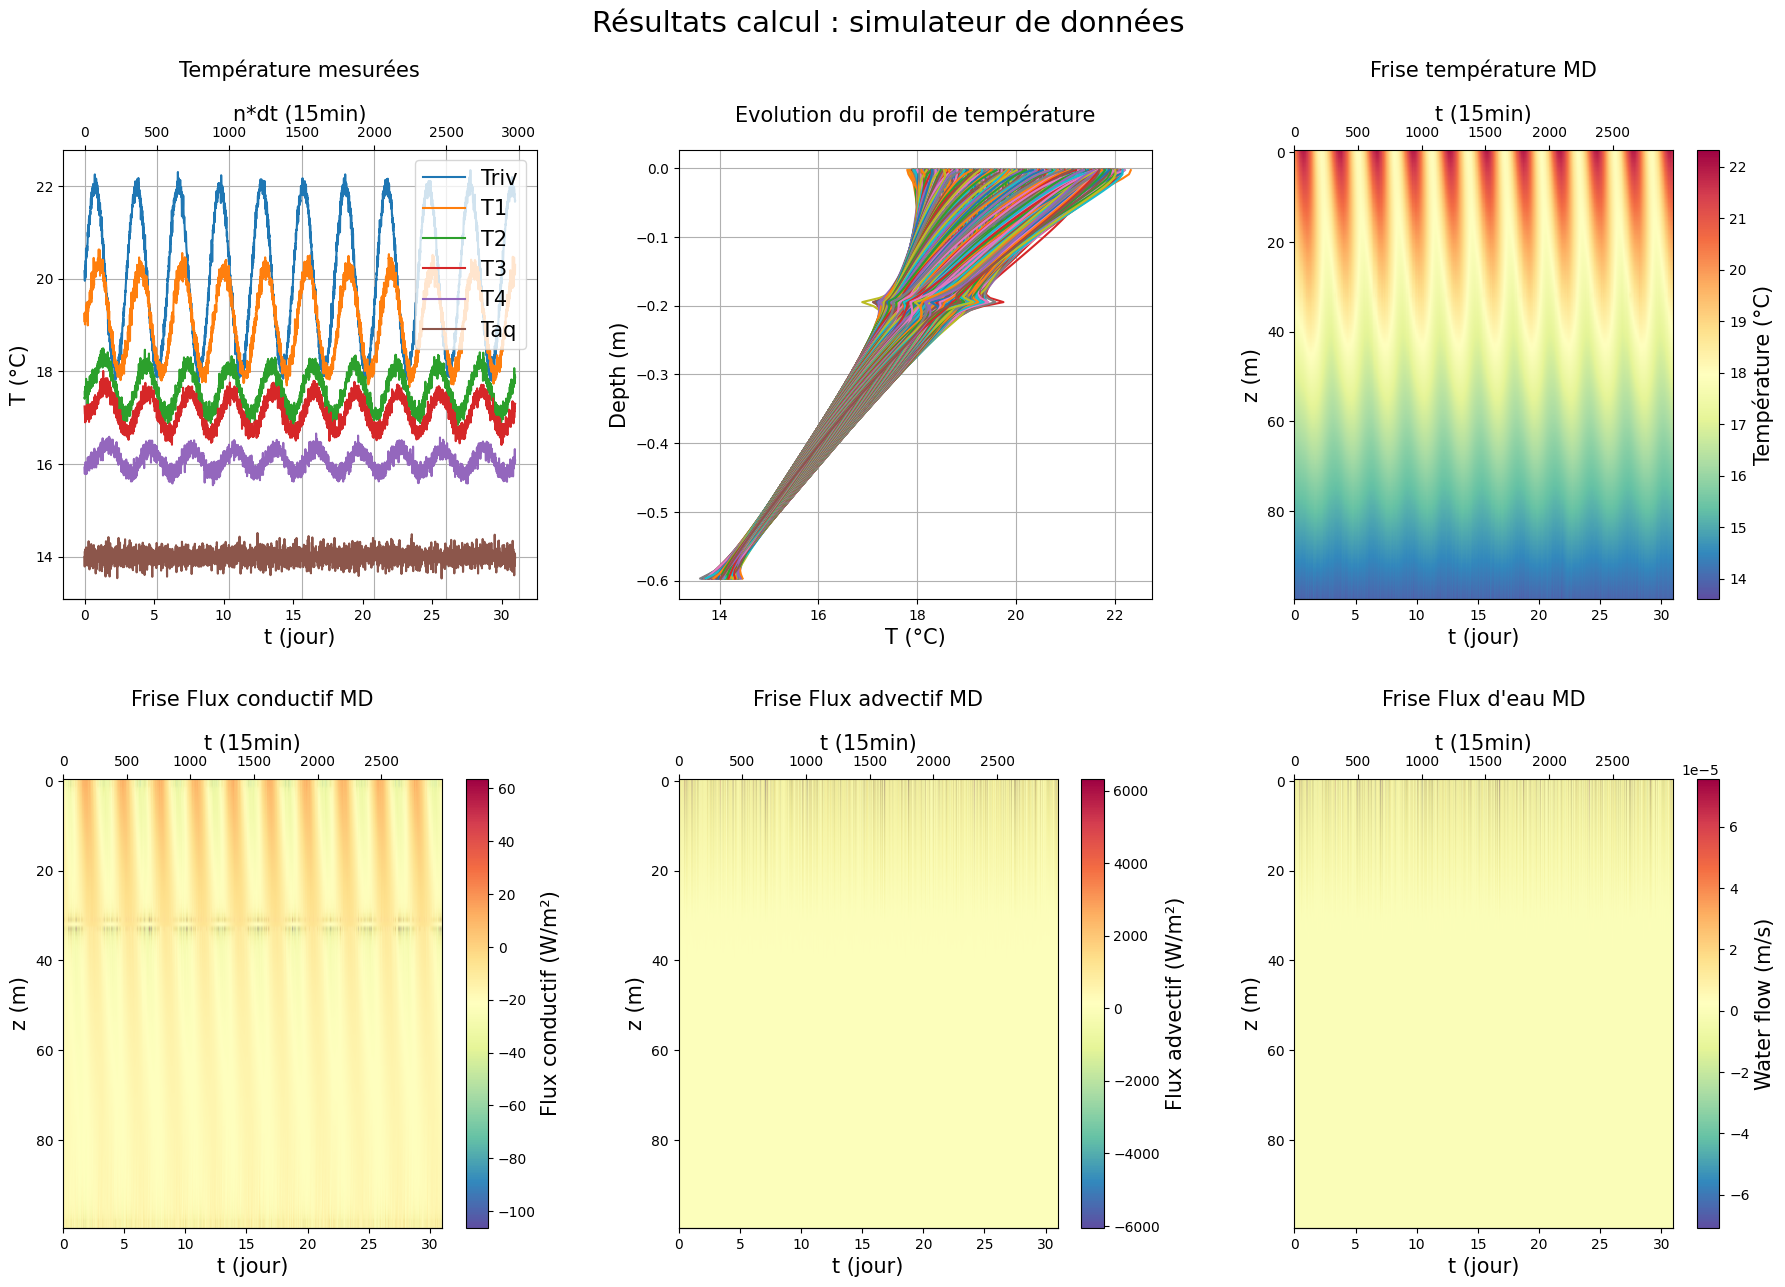

In [12]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Layer1 = {
    "name": "gravier",
    "zLow": .2,
    "moinslog10IntrinK":11,
    "n": .4,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q": 0,
}

Layer2 = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "moinslog10IntrinK":14,
    "n": .1,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q": 0,
}

# on utilise les mesures générées précédemment
col_dict4 = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user4._molonariP_data,
    "T_measures": emu_observ_test_user4._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": emu_observ_test_user4._sigma_P, #float
    "sigma_meas_T": emu_observ_test_user4._sigma_T, #float
}

col4 = Column.from_dict(col_dict4)

# modèle une couche
col4.set_layers([Layer.from_dict(Layer1),Layer.from_dict(Layer2)])

# print(emu_observ_test_user1._T_Shaft)
emu_observ_test_user4._measures_column_one_layer(col4)
#emu_observ_test_user1._plot_molonariT_data()
col4.plot_temperature_at_sensors(verbose=False)


# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol4_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user4._molonariP_data,
    "T_measures": emu_observ_test_user4._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
ncol4 = Column.from_dict(newCol4_dict)
ncol4.set_layers([Layer.from_dict(Layer1),Layer.from_dict(Layer2)])
ncol4.compute_solve_transi(verbose=True)

nt = len(ncol4._temperatures[0,:])
dplot=15
ncol4.plot_temperatures_umbrella(round(nt/dplot))

flows = ncol4.get_flows_solve()
unitLeg="m/s"
title="Débits"
ncol4.plot_it_Zt(flows,title,unitLeg,1.04,2)

ncol4.print_RMSE_at_sensor()
ncol4.plot_compare_temperatures_sensors()
ncol4.plot_CALC_results()
#ncol4.print_in_file_processed_MOLONARI_dataset(zeroT=0) #No printing of the multilayer case study for the usage of demoInversion.ipynb


